# Logistic regression

## Importing libraries

In [1]:
# Import the libraries we need for this lab

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

## Loading datasets (Synthetic data creation)

In [3]:
torch.manual_seed(986)

In [5]:
x = torch.arange(-1, 1, 0.1).view(-1, 1)
y = torch.zeros(x.shape[0], 1)
y[x[:, 0] > 0.2] = 1

### Visualise my problem boundary

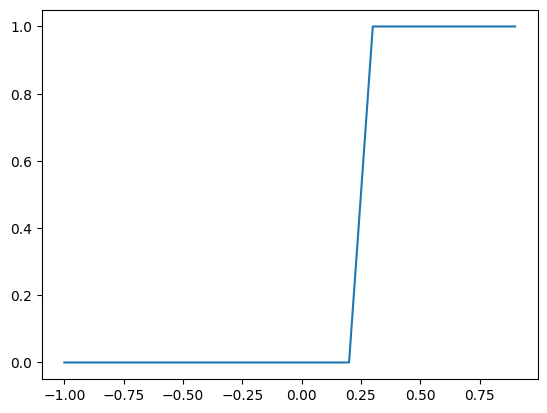

In [11]:
plt.plot(x, y, )

## Data ingestion (Dataset and dataloader)
Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code to be decoupled from our model training code for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

In [12]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self,x,y):
        self.x = x
        self.y = y
        self.len = x.shape[0]
    
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [14]:
# Create Data object

data_set = Data(x,y)

## Model definition (Using nn.Module class)

In [15]:
# Create logistic_regression class

class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [16]:
# Create the logistic_regression result

model = logistic_regression(1)

In [17]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: logistic_regression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


Layer: linear.weight | Size: torch.Size([1, 1]) | Values : tensor([[-0.8444]], grad_fn=<SliceBackward0>) 

Layer: linear.bias | Size: torch.Size([1]) | Values : tensor([-0.9908], grad_fn=<SliceBackward0>) 



### Compile model (deciding on cost and optimisation method)

Replace the random initialized variable values. Theses random initialized variable values did convergence for the RMS Loss but will converge for the Cross-Entropy Loss.

In [18]:
# Set the weight and bias

model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

The parameters:  OrderedDict({'linear.weight': tensor([[-5.]]), 'linear.bias': tensor([-10.])})


In [19]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: logistic_regression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


Layer: linear.weight | Size: torch.Size([1, 1]) | Values : tensor([[-5.]], grad_fn=<SliceBackward0>) 

Layer: linear.bias | Size: torch.Size([1]) | Values : tensor([-10.], grad_fn=<SliceBackward0>) 



In [20]:
# Create dataloader, criterion function and optimizer

def criterion(yhat,y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return out

# Build in criterion
# criterion = nn.BCELoss()

trainloader = DataLoader(dataset = data_set, batch_size = 3)
learning_rate = 2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

## Model training

In [22]:
# Train the Model

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # get_surface.set_para_loss(model, loss.tolist())
        # if epoch % 20 == 0:
        #     get_surface.plot_ps()
            
train_model(100)

## Model prediction & evaluation 

In [23]:
# Make the Prediction

yhat = model(data_set.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == data_set.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(1.)
